# Activity 2.1 : Convolutional Neural Network

## Objective(s):

This activity aims to introduce how to build a convolutional neural network

## Intended Learning Outcomes (ILOs):
* Demonstrate how to build and train convolutional neural network
* Evaluate the accuracy and loss of the model using convolutional neural network

## Resources:
* Jupyter Notebook
* CIFAR-10 dataset

## Procedures
Load the necessary libraries

In [4]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import matplotlib.pyplot as plt
%matplotlib inline

* Shuffle the data
* Split the data into train and test sets

In [5]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170498071/170498071 [==============================] - 2s 0us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


Check the image size

In [6]:
x_train[444].shape

(32, 32, 3)

Visualize one of the images

[9]


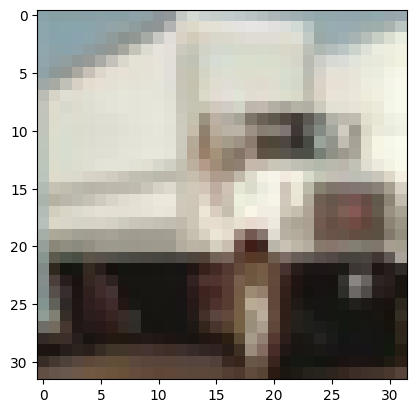

In [7]:
print(y_train[444])
plt.imshow(x_train[444]);

In [8]:
num_classes = 10

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Instead of classes described by an integer between 0-9 we have a vector with a 1 in the (Pythonic) 9th position

In [9]:
y_train[444]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

Convert to float and scale the datasets

In [10]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

Build a CNN using Keras Sequential

In [11]:
model_1 = Sequential()

## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 16, 16, 32)        2432      
                                                                 
 activation (Activation)     (None, 16, 16, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 6, 6, 32)          25632     
                                                                 
 activation_1 (Activation)   (None, 6, 6, 32)          0         
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 32)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 3, 3, 32)          0         
                                                      

* Use batch size of 32
* Initiate RMSprop optimizer
* Train the model using RMSprop

In [12]:
batch_size = 32

opt = keras.optimizers.RMSprop(lr=0.0005)


model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=15,
              validation_data=(x_test, y_test))

Epoch 1/15
1563/1563 [==============================] - 18s 11ms/step - loss: 1.7054 - accuracy: 0.3804 - val_loss: 1.5437 - val_accuracy: 0.4521
Epoch 2/15
1563/1563 [==============================] - 17s 11ms/step - loss: 1.4405 - accuracy: 0.4846 - val_loss: 1.3312 - val_accuracy: 0.5187
Epoch 3/15
1563/1563 [==============================] - 17s 11ms/step - loss: 1.3498 - accuracy: 0.5215 - val_loss: 1.2753 - val_accuracy: 0.5542
Epoch 4/15
1563/1563 [==============================] - 17s 11ms/step - loss: 1.3075 - accuracy: 0.5394 - val_loss: 1.5351 - val_accuracy: 0.4796
Epoch 5/15
1563/1563 [==============================] - 16s 10ms/step - loss: 1.2735 - accuracy: 0.5574 - val_loss: 1.2228 - val_accuracy: 0.5828
Epoch 6/15
1563/1563 [==============================] - 17s 11ms/step - loss: 1.2624 - accuracy: 0.5627 - val_loss: 1.1415 - val_accuracy: 0.6021
Epoch 7/15
1563/1563 [==============================] - 16s 10ms/step - loss: 1.2522 - accuracy: 0.5687 - val_loss: 1.2778 -

## Supplementary Activity

* Build a more complicated model with the following pattern:
Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification

* Use strides of 1 for all convolutional layers.

* Write the number of parameters of your model  and compare it to the previous model

* Train it for 5 epochs. Compare the training time, loss and accuracy numbers (on both the training and validation sets)?

* Use different structures and run times, and see how accurate your model can be.

In [13]:
from keras import layers, models

In [14]:
supple_model_1 = models.Sequential([
    layers.Conv2D(32, (3,3), strides=(1,1), activation='relu', padding='same', input_shape=(32,32,3)),
    layers.Conv2D(64, (3,3,), strides=(1,1), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3,), strides=(1,1), activation='relu', padding='same'),
    layers.Conv2D(128, (3,3,), strides=(1,1), activation='relu', padding='same'),
    layers.MaxPooling2D(2,2),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),

    layers.Dense(10, activation='softmax')
])

In [15]:
opt = keras.optimizers.RMSprop(lr=0.0005)

supple_model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [ ]:
runhist_model1 = supple_model_1.fit(x_train, y_train,
                                    batch_size = 32,
                                    epochs = 5,
                                    validation_data = (x_test, y_test))

Epoch 1/5
1563/1563 [==============================] - 263s 168ms/step - loss: 1.4183 - accuracy: 0.4903 - val_loss: 1.0074 - val_accuracy: 0.6407
Epoch 2/5
1563/1563 [==============================] - 278s 178ms/step - loss: 0.8736 - accuracy: 0.6947 - val_loss: 0.8624 - val_accuracy: 0.7001
Epoch 3/5
1563/1563 [==============================] - 270s 173ms/step - loss: 0.6558 - accuracy: 0.7744 - val_loss: 0.7876 - val_accuracy: 0.7320
Epoch 4/5
1563/1563 [==============================] - 261s 167ms/step - loss: 0.5076 - accuracy: 0.8286 - val_loss: 0.7726 - val_accuracy: 0.7622
Epoch 5/5
1563/1563 [==============================] - 265s 169ms/step - loss: 0.3888 - accuracy: 0.8682 - val_loss: 0.8048 - val_accuracy: 0.7544


In [ ]:
test_loss, test_acc = supple_model_1.evaluate(x_test, y_test)

313/313 [==============================] - 14s 44ms/step - loss: 0.8048 - accuracy: 0.7544


In [ ]:
runhist_model1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

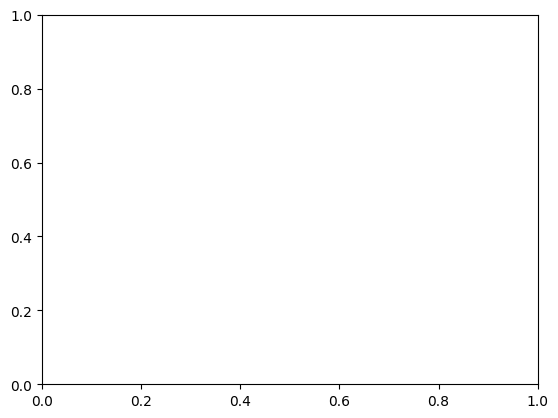

In [ ]:
fig, ax = plt.subplots()

In [ ]:
"""
Write the number of parameters of your model and compare it to the previous model
"""

'\nWrite the number of parameters of your model and compare it to the previous model\n'

In [ ]:
supple_model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 conv2d_9 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 8, 8, 128)         0         
 g2D)                                                 

In [ ]:
"""
Train it for 5 epochs.
Compare the training time, loss and accuracy numbers (on both the training and validation sets)?
"""

'\nTrain it for 5 epochs.\nCompare the training time, loss and accuracy numbers (on both the training and validation sets)?\n'

In [ ]:
batch_size = 32

opt = keras.optimizers.RMSprop(lr=0.0001)


supple_model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

supple_model_1.fit(X_train, y_train,
              batch_size=batch_size,
              epochs=5,
              validation_data=(x_test, y_test))

NameError: name 'X_train' is not defined

In [ ]:
"""
Use different structures and run times, and see how accurate your model can be.
"""

#### Evaluation

#### Graph of Accuray and Loss (Training and Validation)

### CIFAR 100 DATASET

#### Data Preparation

#### Data Visualization

#### Building Model

#### Evaluation

#### Graph of Accuracy and Loss (Training and Validation)

## Conclusion